# Project: Prediction using Unsupervised Machine Learning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>   
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Iris dataset

>This dataset includes records about Iris's sepal length, sepal width, petal length and petal width

>We aim to predict the species of the Iris using k-means Clustering (Unsupervised ML)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, explore it, and then trim and clean the dataset for analysis.

In [2]:
# Load the iris dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.set_index('Id', inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated().sum()

3

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

# Subsetting the Data

In [10]:
x = df.iloc[:, [0, 1, 2, 3]].values
xs = df['SepalLengthCm']
ys = df['SepalWidthCm']

## Data Visualization before Clustering

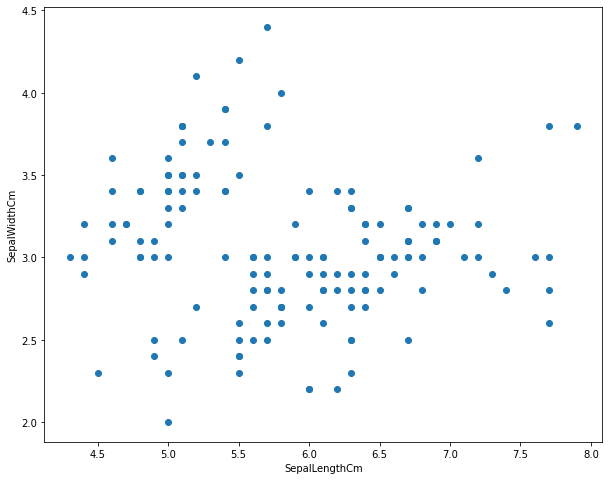

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(xs,ys)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show();

## Deciding the right number of Clusters using Inertia

C:\Users\HP\Downloads\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


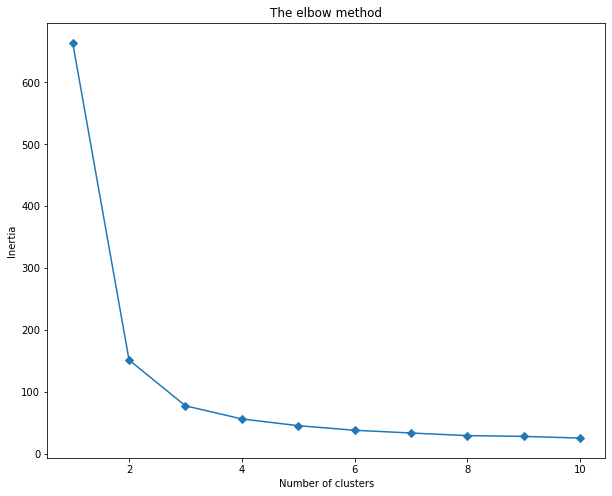

In [21]:
lst = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    lst.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), lst, marker = 'D')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

>From the graph, 3 clusters is the best choice

In [13]:
model = KMeans(n_clusters = 3)
model.fit(x)
labels = model.predict(x)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 2 2
 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0]


In [14]:
centroids = model.cluster_centers_
centroid_x = centroids[:,0]
centroids_y = centroids[:,1]

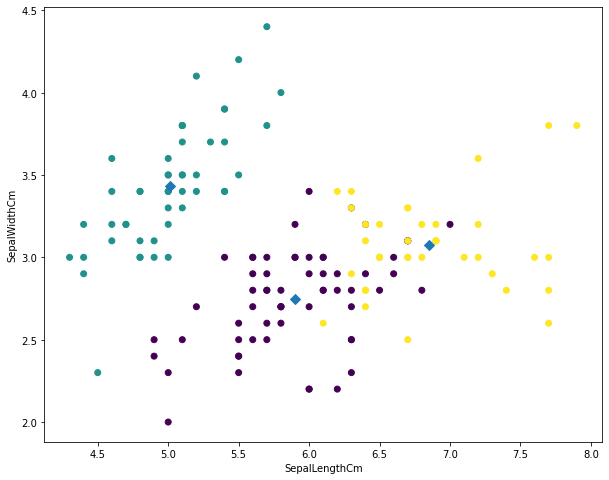

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(xs,ys,c=labels)
plt.scatter(centroid_x,centroids_y, marker = 'D', s = 50)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show();

In [16]:
df_new = pd.DataFrame({'labels' : labels, 'species':df['Species']})
df_new.head()

,labels,species
Id,,
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa
5,1,Iris-setosa


In [17]:
ct = pd.crosstab(df_new['labels'], df_new['species'])
print(ct)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0               48              13
1                 48                0               0
2                  0                2              36


>There is still a space for improvement 

# Normalizing the data for better prediction

In [18]:
from sklearn.preprocessing import normalize
scaled_data = normalize(x)
kmeans = KMeans(n_clusters = 3)

kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)

In [19]:
df_2 = pd.DataFrame({'labels':labels, 'species':df['Species']})

In [20]:
ct_2 = pd.crosstab( df_2['species'], df_2['labels'])
print(ct_2)

labels            0   1   2
species                    
Iris-setosa      48   0   0
Iris-versicolor   0   5  45
Iris-virginica    0  49   0


>After Normalizing the data, the model was able to predict the Iris-setosa with Precision of 100%, the Iris-versicolor with 100%
and the Iris-virginica with 91%.